# Preprocessing function

Illustration of effects is on https://gitee.com/alavaien/imgaug


In [29]:
!pip install imgaug

In [30]:
import logging

logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)

# Building blocks for the joint function

In [3]:
import numpy as np
from imgaug import augmenters as iaa
from skimage import exposure
import cv2
import random
    
def normalize(x):
    return (x / 255.0).copy()
    
def denormalize(x):
    return (x * 255.0).copy()

def perform_crop(x):
    magnitude = 0.634
    x = iaa.Crop(px=(0, int(magnitude * 32))).augment_image(x)
    return x

def perform_additive_gaussian_noise(x):
    magnitude = 0.25
    x = iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, magnitude * 255), per_channel=0.5).augment_image(x)
    return x

def perform_gamma_contrast(x):
    magnitude = 0.75
    X_norm = normalize(x)
    X_aug_norm = iaa.GammaContrast(magnitude * 1.75).augment_image(X_norm)
    x = denormalize(X_aug_norm)
    return x

def perform_elastic_transform(x):
    magnitude = 0.1
    X_norm = normalize(x)
    X_norm2 = (X_norm * 2) - 1
    X_aug_norm2 = iaa.ElasticTransformation(alpha=(0.0, max(0.5, magnitude * 300)), sigma=5.0).augment_image(X_norm2)
    X_aug_norm = (X_aug_norm2 + 1) / 2
    x = denormalize(X_aug_norm)
    return x

def perform_add_to_hue_and_saturation(x):
    magnitude = 0.5
    x = iaa.AddToHueAndSaturation((int(-45 * magnitude), int(45 * magnitude))).augment_image(x.astype(np.uint8))
    x = x.astype(float)
    return x

def perform_coarse_salt_and_pepper(x):
    magnitude = 0.25
    x = iaa.CoarseSaltAndPepper(p=0.2, size_percent=magnitude).augment_image(x)
    return x


def perform_gaussian_blur(x):
    magnitude = 3.0/25.0
    x = iaa.GaussianBlur(sigma=(0, magnitude * 25.0)).augment_image(x)
    return x

def perform_sharpen(x):
    magnitude = 0.5
    x = iaa.Sharpen(alpha=(0, 1.0), lightness=(0.50, 5 * magnitude)).augment_image(x)
    return x

def perform_brighten(x):
    magnitude = 1.0
    x = iaa.Add((int(-40 * magnitude), int(40 * magnitude)), per_channel=0.5).augment_image(x)
    return x

def perform_all_channel_histogram_equalization(x):
    x = iaa.AllChannelsHistogramEqualization().augment_image(x.astype(np.uint8))
    x = x.astype(float)
    return x


def perform_perspective_transform(x):
    magnitude = 0.15
    X_norm = normalize(x)
    X_aug_norm = iaa.PerspectiveTransform(scale=(0.01, max(0.02, magnitude))).augment_image(X_norm) 
    # first scale param must be larger
    np.clip(X_aug_norm, 0.0, 1.0, out=X_aug_norm)
    x = denormalize(X_aug_norm)
    return x

def perform_grayscale(x):
    magnitude = 1.0
    x = iaa.Grayscale(alpha=(0.25, magnitude)).augment_image(x.astype(np.uint8))
    x = x.astype(float)
    return x

# Functions for visualisations

In [4]:
def perform_rotate(x):
    x = iaa.Affine(rotate=(-20, 20)).augment_image(x)
    return x

def perform_horizontal_flip(x):
    x = iaa.Fliplr(1.0).augment_image(x)
    return x

# Visualisation of each function (separately)

In [31]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def display_augmented_images(aug_function):

    datagen = ImageDataGenerator(samplewise_center=True,
                                 samplewise_std_normalization=True,
                                 preprocessing_function = aug_function)
    train_data = datagen.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)

    fig, axe = plt.subplots(1, 4, figsize = (15, 60))
    for i in range(4):
        batch = train_data.next()
        aug_img = batch[0][0]
        axe[i].imshow(aug_img, interpolation="nearest")
        axe[i].set_xticks([])
        axe[i].set_yticks([])
    plt.show()

Found 6 images belonging to 2 classes.


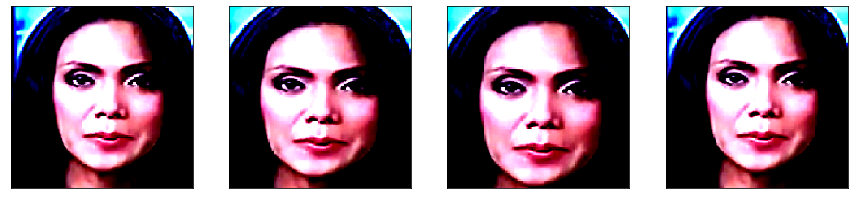

In [7]:
display_augmented_images(perform_crop)

Found 6 images belonging to 2 classes.


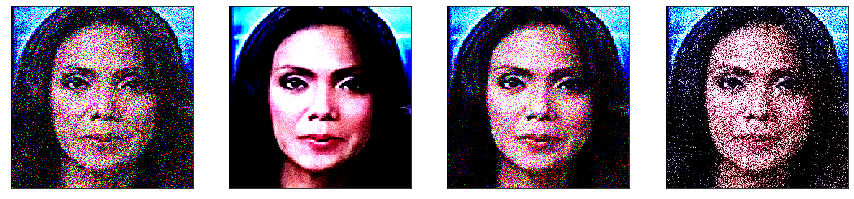

In [8]:
display_augmented_images(perform_additive_gaussian_noise)

Found 6 images belonging to 2 classes.


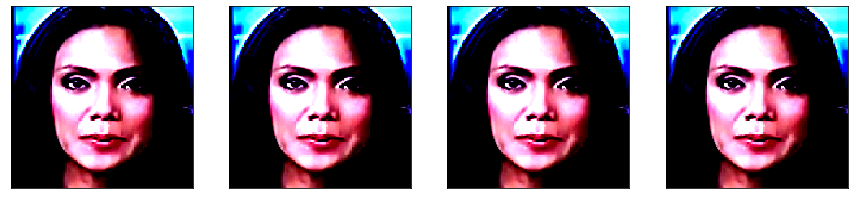

In [9]:
display_augmented_images(perform_gamma_contrast)

Found 6 images belonging to 2 classes.


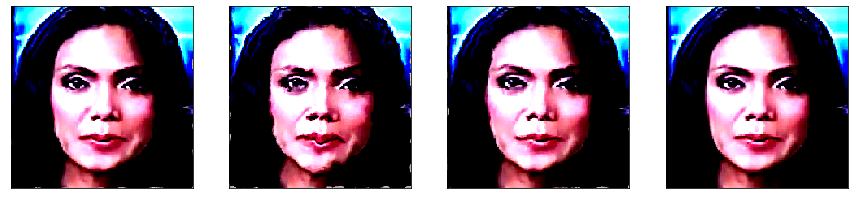

In [10]:
display_augmented_images(perform_elastic_transform)

Found 6 images belonging to 2 classes.


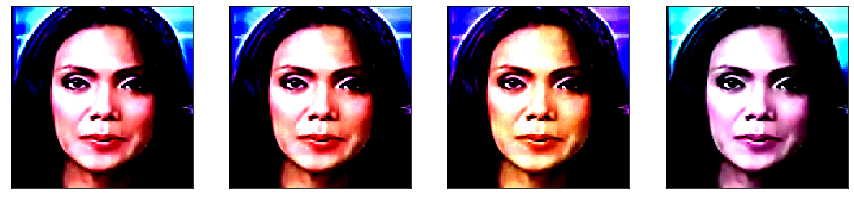

In [11]:
display_augmented_images(perform_add_to_hue_and_saturation)

Found 6 images belonging to 2 classes.


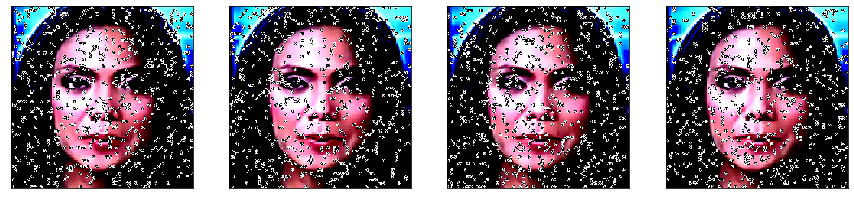

In [12]:
display_augmented_images(perform_coarse_salt_and_pepper)

Found 6 images belonging to 2 classes.


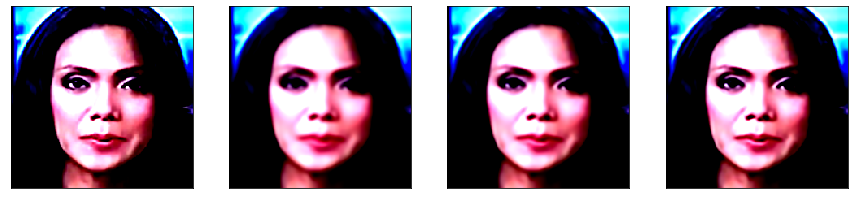

In [13]:
display_augmented_images(perform_gaussian_blur)

Found 6 images belonging to 2 classes.


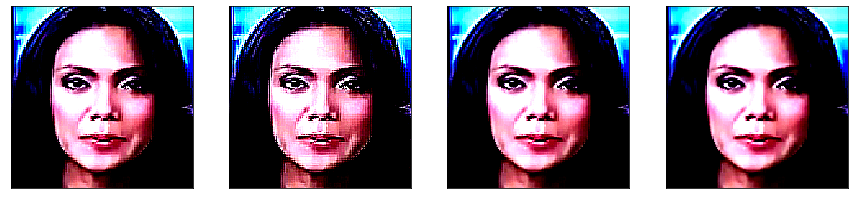

In [14]:
display_augmented_images(perform_sharpen)

Found 6 images belonging to 2 classes.


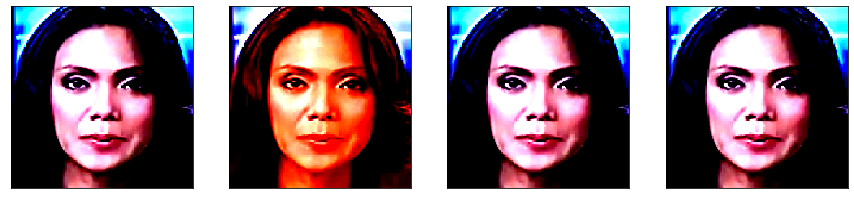

In [15]:
display_augmented_images(perform_brighten)

Found 6 images belonging to 2 classes.


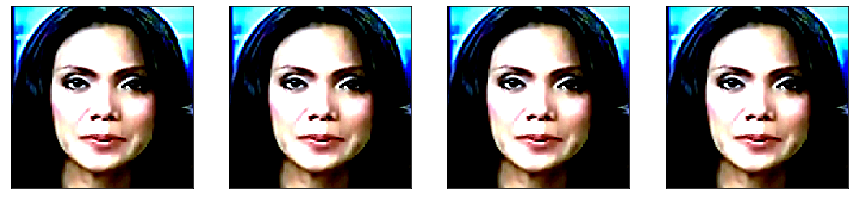

In [16]:
display_augmented_images(perform_all_channel_histogram_equalization)

Found 6 images belonging to 2 classes.


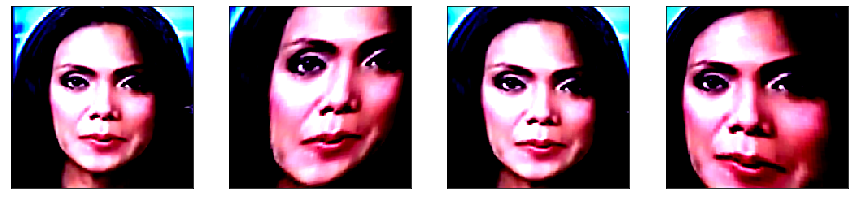

In [17]:
display_augmented_images(perform_perspective_transform)

Found 6 images belonging to 2 classes.


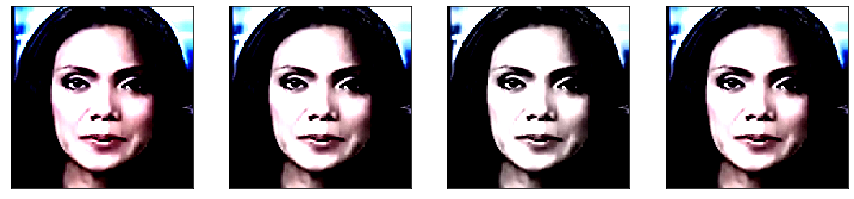

In [18]:
display_augmented_images(perform_grayscale)

# Visualisations for the report

## Geomentry-based augmentations

In [7]:
original = plt.imread('flow_test/1/0135 copy.png')

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


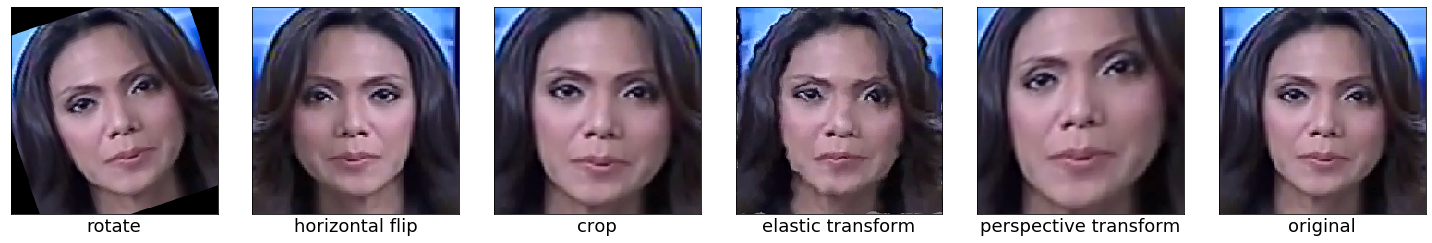

In [25]:
fig, axe = plt.subplots(1, 6, figsize = (20, 20*6))
for i, aug_function in enumerate([perform_rotate, perform_horizontal_flip, perform_crop, perform_elastic_transform, perform_perspective_transform, None]):
    
    datagen = ImageDataGenerator(preprocessing_function = aug_function)
    train_data = datagen.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)
    
    batch = train_data.next()
    aug_img = batch[0][0]
    axe[i].imshow(aug_img.astype(int), interpolation="nearest")
    axe[i].set_xticks([])
    axe[i].set_yticks([])
    if i == 0:
        label = 'rotate'
    elif i == 1:
        label = 'horizontal flip'
    elif i == 2:
        label = 'crop'
    elif i == 3:
        label = 'elastic transform'
    elif i == 4:
        label = 'perspective transform'
    else:
        label = 'original'
    axe[i].set_xlabel(label, fontsize = 18)
plt.tight_layout()
plt.show()

## Colour-based augmentations

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


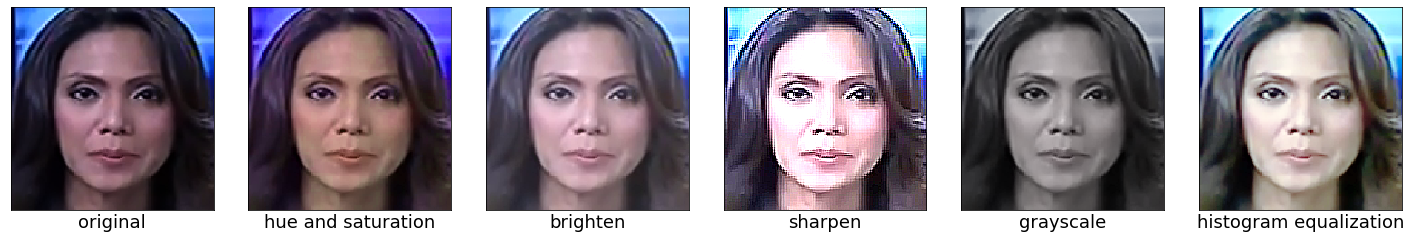

In [35]:
fig, axe = plt.subplots(1, 6, figsize = (20 , 20 * 6))
for i, aug_function in enumerate([perform_gamma_contrast, perform_add_to_hue_and_saturation, perform_brighten, perform_sharpen, perform_grayscale, perform_all_channel_histogram_equalization]):
    
    datagen = ImageDataGenerator(preprocessing_function = aug_function)
    train_data = datagen.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)
    
    batch = train_data.next()
    aug_img = batch[0][0]
    axe[i].imshow(aug_img.astype(int), interpolation="nearest")
    axe[i].set_xticks([])
    axe[i].set_yticks([])
    if i == 0:
        #label = 'gamma contrast'
        label = 'original'
    elif i == 1:
        label = 'hue and saturation'
    elif i == 2:
        label = 'brighten'
    elif i == 3:
        label = 'sharpen'
    elif i == 4:
        label = 'grayscale'
    else:
        label = 'histogram equalization'
    axe[i].set_xlabel(label, fontsize = 18)
plt.tight_layout()
plt.show()

## Noise-based augmentations

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


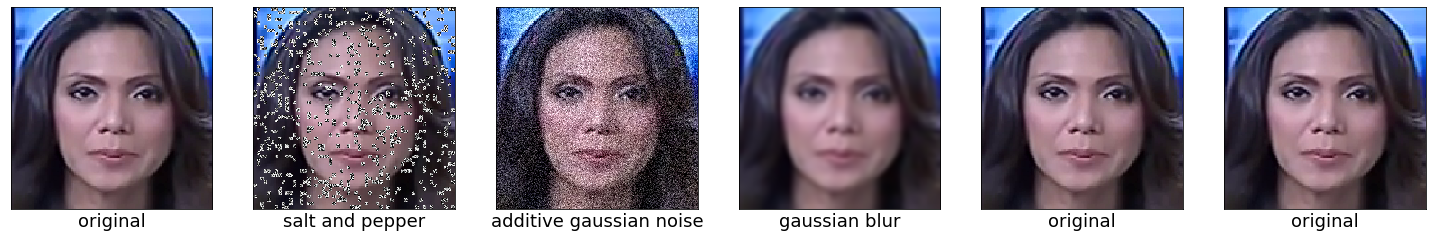

In [28]:
fig, axe = plt.subplots(1, 6, figsize = (20 , 20*6))
for i, aug_function in enumerate([None, perform_coarse_salt_and_pepper, perform_additive_gaussian_noise, perform_gaussian_blur, None, None]):
    
    datagen = ImageDataGenerator(preprocessing_function = aug_function)
    train_data = datagen.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)
    
    batch = train_data.next()
    aug_img = batch[0][0]
    axe[i].imshow(aug_img.astype(int), interpolation="nearest")
    axe[i].set_xticks([])
    axe[i].set_yticks([])
    if i == 0:
        label = 'original'
    elif i == 1:
        label = 'salt and pepper'
    elif i == 2:
        label = 'additive gaussian noise'
    elif i == 3:
        label = 'gaussian blur'
    else:
        label = 'original'

    axe[i].set_xlabel(label, fontsize = 18)
plt.tight_layout()
plt.show()

# Final code

In [29]:
def joint_function(x):
    
    # No augmentations with probability (1/5)
    #############################################################
    chance = np.random.random()
    if chance <= 1/5:
        return x
    #############################################################
    
    # DEEPAUGMENT'S OPTIMAL POLICY (2/5)
    #############################################################
    elif chance <= 3/5:
    # either a colour-based double augmentation or one out of four,
    # which all consist of one geometry based and one noise-based
    # augmentations
    # all with equal probability of 8%
    
        # Colour-based
        if np.random.random() <= 1/5:
            x = perform_gamma_contrast(x)
            x = perform_add_to_hue_and_saturation(x)
        
        # combine one noise-based and one geometry-based method
        else:
        
            # noise
            if np.random.random() <= 1/2:
                x = perform_coarse_salt_and_pepper(x)
            else:
                x = perform_additive_gaussian_noise(x)

            # geometry-based methods
            if np.random.random() <= 1/2:
                x = perform_crop(x)
            else:
                x = perform_elastic_transform(x)
    #############################################################
    
    # ADDITIONAL AUGMENTATIONS (2/5)
    #############################################################
    else:
    # secondary transformations all with equal probability 6.67%
        second_chance = np.random.random()
        
        if  second_chance <= 1/6:
            x = perform_gaussian_blur(x)
        elif second_chance <= 1/3:
            x = perform_sharpen(x)
        elif second_chance <= 1/2:
            x = perform_brighten(x)
        elif second_chance <= 2/3:
            x = perform_all_channel_histogram_equalization(x)
        elif second_chance <= 5/6:
            x = perform_perspective_transform(x)
        else:
            x = perform_grayscale(x)
    #############################################################

    return x

def display_all_augmentations(n):
    fig, axe = plt.subplots(n, n, figsize = (30, 30))
    
    datagen = ImageDataGenerator(samplewise_center = True,
                                 samplewise_std_normalization = True,
                             
                                 rotation_range=20,
                                 horizontal_flip=True,

                                 preprocessing_function = joint_function)
    train_data = datagen.flow_from_directory('flow_test', target_size=(224, 224), batch_size = 4)
    
    for j in range(n):  
        for i in range(n):
            batch = train_data.next()
            aug_img = batch[0][0]
            # print(aug_img)
            # axe[j][i].imshow(aug_img.astype(int), interpolation="nearest")
            axe[j][i].imshow(aug_img, interpolation="nearest")
            axe[j][i].set_xticks([])
            axe[j][i].set_yticks([])
    plt.show()

Found 6 images belonging to 2 classes.


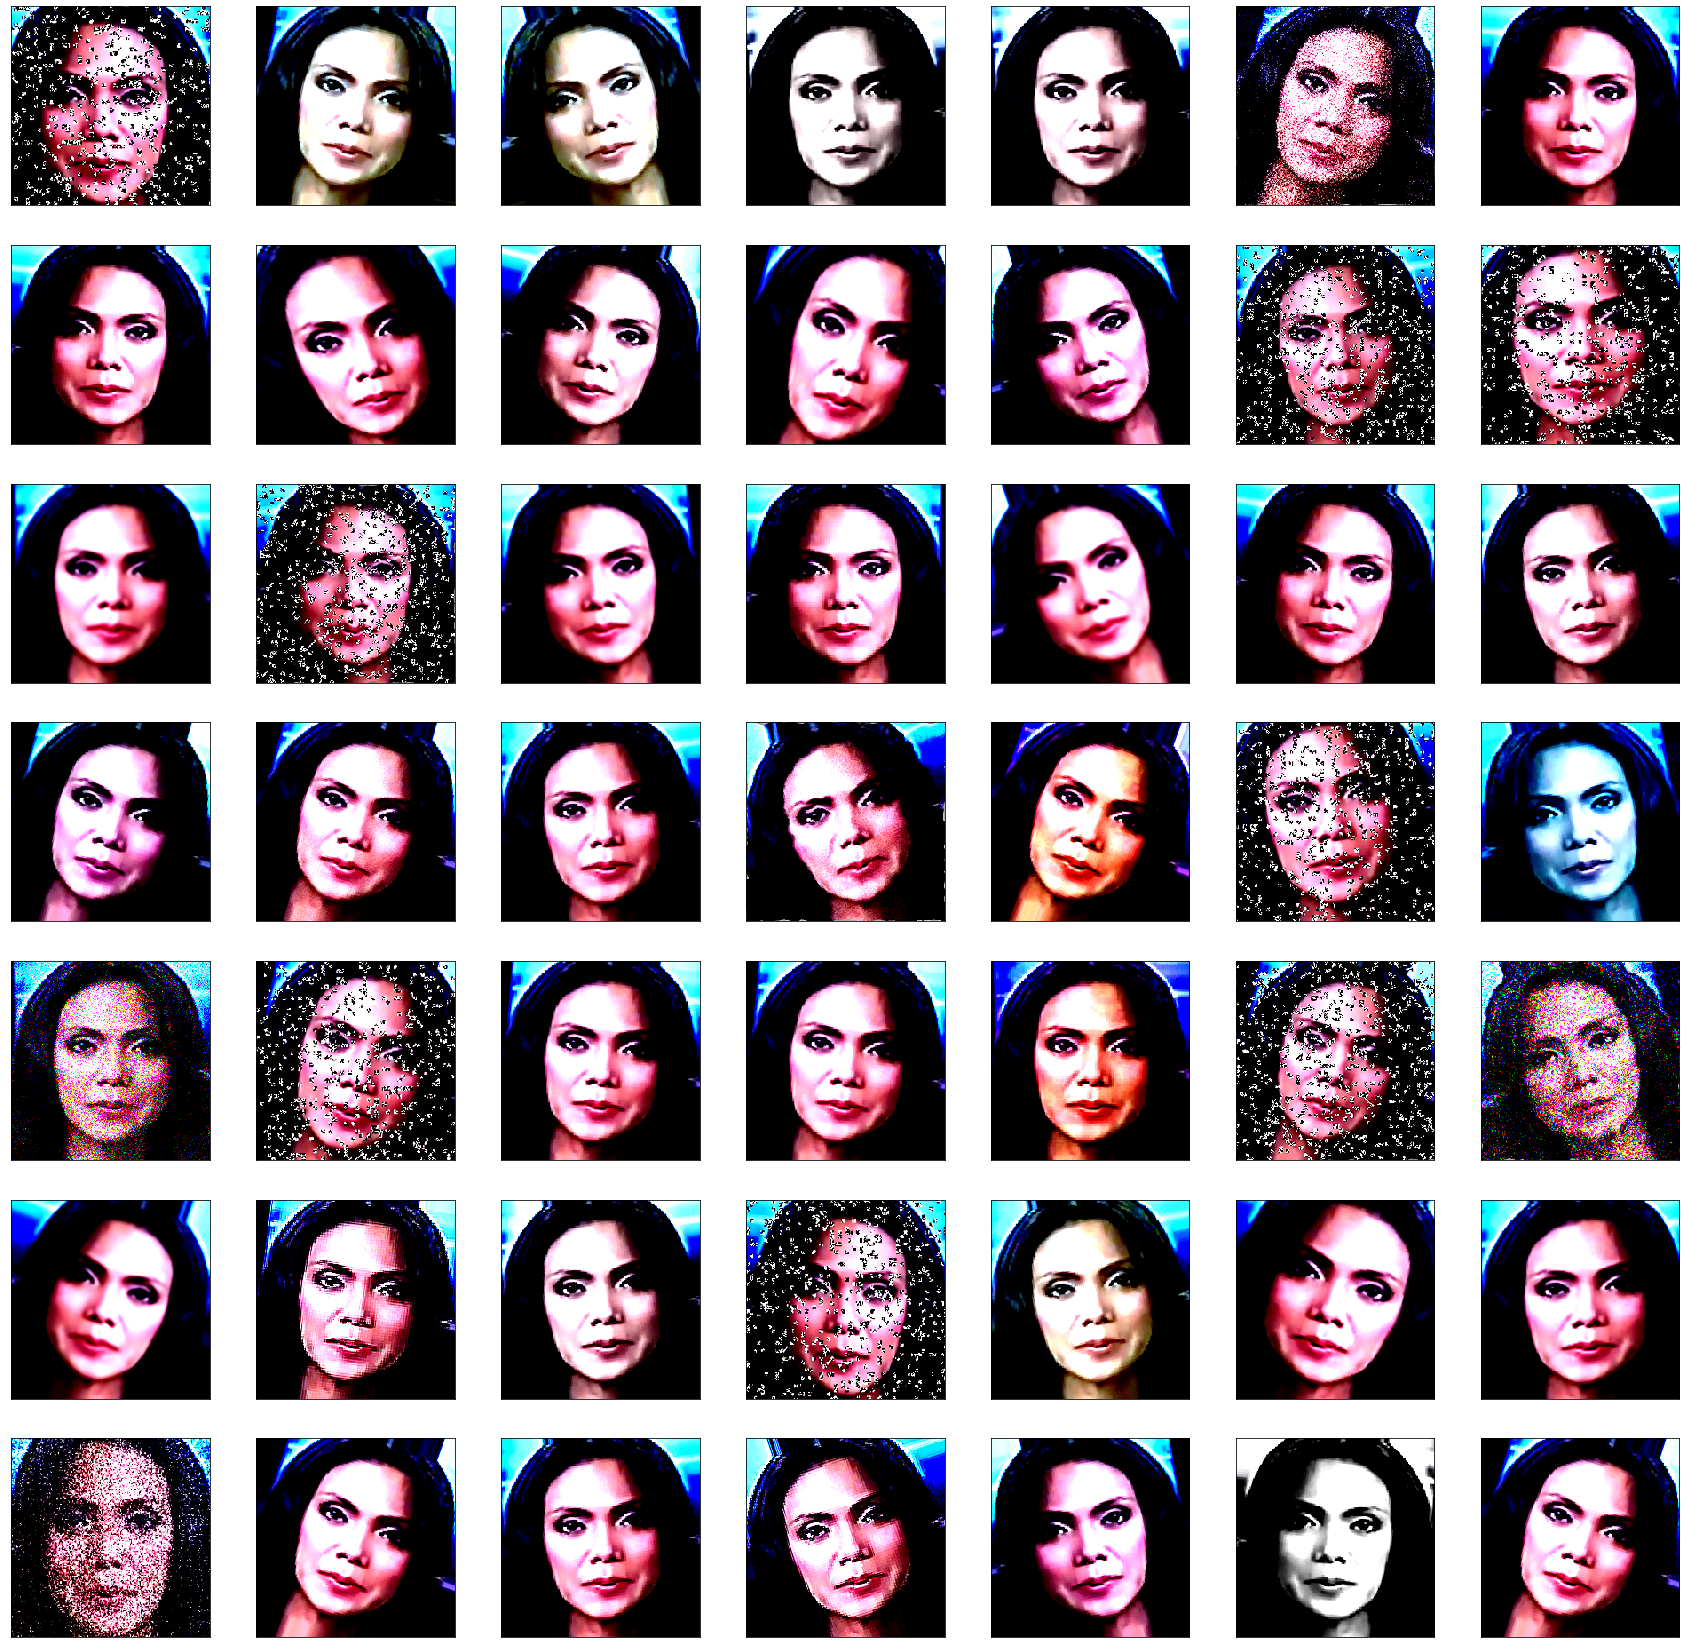

In [30]:
display_all_augmentations(7)

In [31]:
logger.setLevel(old_level)